# Развитие игровой индустрии с 2000 по 2013 год
- Автор: Дарья
- Дата: 27.11.2024

### Цели и задачи проекта
Целью проекта является анализ развития игровой индустрии с 2000 по 2013 год с акцентом на популярные RPG-игры для последующего использования данных в статье от команды игры "Секреты Темнолесья". 
Для реализации проекта мы ставим перед собой задачи:
- Ознакомиться с собранными данными
- Предобработать данные
- Выделить данные с 2000 по 2013 год
- Проверить данные на наличие пропущенных значений, дубликатов
- Реализовать категоризацию по оценкам пользователей и экспертов
- Проанализировать платформы и составленить рейтинг на основе количества выпущенных игр


### Описание данных
Данные `/datasets/new_games.csv` содержат информацию о продажах игр разных жанров и платформ, а также пользовательские и экспертные оценки игр:
- `Name` — название игры.
- `Platform` — название платформы.
- `Year of Release` — год выпуска игры.
- `Genre` — жанр игры.
- `NA sales` — продажи в Северной Америке (в миллионах проданных копий).
- `EU sales` — продажи в Европе (в миллионах проданных копий).
- `JP sales` — продажи в Японии (в миллионах проданных копий).
- `Other sales` — продажи в других странах (в миллионах проданных копий).
- `Critic Score` — оценка критиков (от 0 до 100).
- `User Score` — оценка пользователей (от 0 до 10).
- `Rating` — рейтинг организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Содержимое 
- [1. Загрузка и знакомство с данными](#1.-Загрузка-и-знакомство-с-данными)
- [2. Предобработка данных и поиск ошибок](#2.-Предобработка-данных-и-поиск-ошибок)
    - [2.1. Названия, или метки, столбцов датафрейма](#2.1.-Названия,-или-метки,-столбцов-датафрейма:)
    - [2.2. Типы данных](#2.2.-Типы-данных:)
    - [2.3. Наличие пропусков в данных](#2.3.-Наличие-пропусков-в-данных:)
    - [2.4. Явные и неявные дубликаты в данных](#2.4.-Явные-и-неявные-дубликаты-в-данных:)
- [3. Фильтрация данных](#3.-Фильтрация-данных)
- [4. Категоризация данных](#4.-Категоризация-данных)
- [5. Итоговый вывод](#5.-Итоговый-вывод)

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 

Описание проекта составлено очень хорошо, чувствуется внимательный подход к постановке целей и задач. Здорово, что есть чёткая формулировка цели, разделение задач по ключевым аспектам и описание датасета.

Такое начало проекта создаёт хорошее впечатление и задаёт высокий стандарт на дальнейшие этапы. 
</div>

Я перепробовала все... и задавать id и просто выводить по url - оглавление у меня не работает. Как-то открывается 1 пункт, а остальное не реагирует никак при нажатии. Не понимаю в чем проблема 

<img src="https://memi.klev.club/uploads/posts/2024-04/memi-klev-club-d4s1-p-memi-s-grustnim-kotom-21.jpg" width="240"> 

<div class="alert alert-warning">
<b> Комментарий от ревьюера</b>

Может это какая-то локальная проблема: у меня пункты оглавления выше работают правильно. Как вариант добавления оглавления могу посоветовать такой:
    
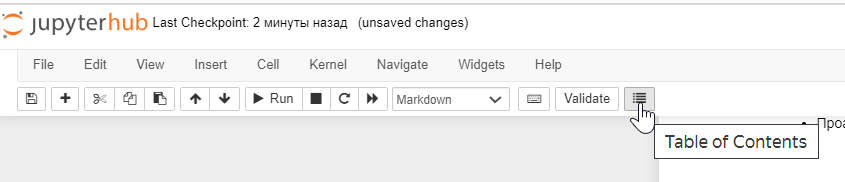

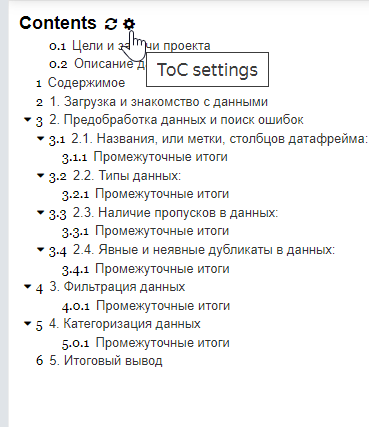
    
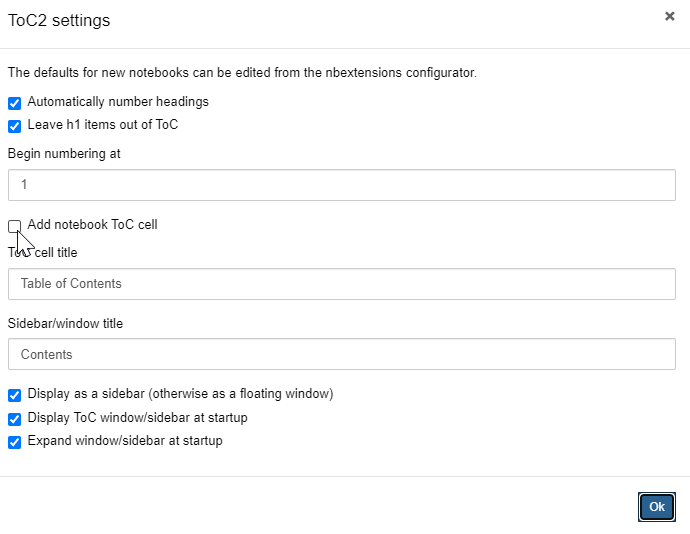
    
И еще можно убрать лишние цифры в заголовках, чтобы они не дублировались, и оставить только автоматическую нумерацию:
    
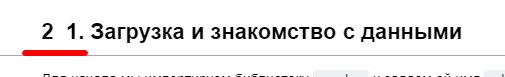
</div>

<div class="alert alert-info">
Лишние цифры в заголовках убрала, спасибо) 
</div>

## Загрузка и знакомство с данными

Для начала мы импортируем библиотеку `pandas` и задаем ей имя `pd`

In [1]:
import pandas as pd

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 

Хорошо, что импорт вынесен в отдельную ячейку. Это позволяет сразу увидеть, какие библиотеки и модули используются в проекте. Такой подход делает код более читаемым и понятным для других разработчиков и проверяющих.
</div>

Теперь мы можем загрузить данные из датасета `/datasets/new_games.csv`

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/new_games.csv')

Ознакомимся с данными и для этого выведем первые 10 строк датафрейма

In [3]:
df.head(10)

,Name,Platform,Year of Release,Genre,NA sales,EU sales,JP sales,Other sales,Critic Score,User Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.5,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.7,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Теперь ознакомимся с типами данных в столбцах и заодно проверим наличие пропусков

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16954 non-null  object 
 1   Platform         16956 non-null  object 
 2   Year of Release  16681 non-null  float64
 3   Genre            16954 non-null  object 
 4   NA sales         16956 non-null  float64
 5   EU sales         16956 non-null  object 
 6   JP sales         16956 non-null  object 
 7   Other sales      16956 non-null  float64
 8   Critic Score     8242 non-null   float64
 9   User Score       10152 non-null  object 
 10  Rating           10085 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB
None


<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 

Основная информация о таблице выведена, супер.
</div>

Всего 16956 строк. Можно заметить пропуски в таких столбцах:
- `Name`
- `Year of Release`
- `Genre`
- `Critic Score`
- `User Score`
- `Rating`

В датасете 11 столбцов и их все необходимо привести к стилю snake_case. 

Еще необходимо поменять тип данных в столбцах `EU sales`, `JP sales`, `User Score` на числовой, а `Year of Release` поменять на int64, так как столбец хранит данные о годе релиза видеоигры и здесь нам не понадобится значение с запятой.


И нужно будет обязательно проверить дубликаты.

<div class="alert alert-block alert-warning">
    
<b>Комментарий ревьюера:</b> 

Вывод можно немного дополнить для большей ясности и глубины анализа:
    
* указать количество столбцов в датасете;
* указать, что столбцы необходимо переименовать, приведя названия к snake_case;
* указать столбцы, в которых необходимо изменить тип данных;
* отметить необходимость проверки дубликатов.
    
</div>

<div class="alert alert-info">
Дополнила) 
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Отлично, теперь у нас есть полная информация в выводе.

</div>


## Предобработка данных и поиск ошибок

### Названия, или метки, столбцов датафрейма: 

Для удобства выводим названия всех столбцов датафрейма

In [5]:
# Используем атрибут .columns, который хранит названия столбцов
df.columns

Index(['Name', 'Platform', 'Year of Release', 'Genre', 'NA sales', 'EU sales',
       'JP sales', 'Other sales', 'Critic Score', 'User Score', 'Rating'],
      dtype='object')

Приводим все столбцы к стилю snake case. Названия должны быть в нижнем регистре, а вместо пробелов — подчёркивания.

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_') #метод .lower() приводит значения к нижнему регистру, а метод .replase() меняет пробелы на _

In [7]:
df.info() # проверяем итоговый вариант (а именно названия столбцов) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16954 non-null  object 
 1   platform         16956 non-null  object 
 2   year_of_release  16681 non-null  float64
 3   genre            16954 non-null  object 
 4   na_sales         16956 non-null  float64
 5   eu_sales         16956 non-null  object 
 6   jp_sales         16956 non-null  object 
 7   other_sales      16956 non-null  float64
 8   critic_score     8242 non-null   float64
 9   user_score       10152 non-null  object 
 10  rating           10085 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 
    
Отлично, столбцы выведены на экран и переименованы.
</div>

#### Промежуточные итоги
Все названия столбцов были преобразованы в стиль snake case. Для этого названия столбцов приведены к нижнему регистру, а пробелы заменены на нижние подчеркивания

### Типы данных: 

Обратим внимания на столбцы:
- `eu_sales`
- `jp_sales`
- `user_score`

В этих столбцах находятся числовые данные, однако тип данных этих столбцов - `object`.
Необходимо преобразовать эти столбцы в числовой тип данных. Вполне возможно, что помимо числовых значений нам могут встретиться строковые значения. 

Для корректного преобразования сначала выведем уникальные значения в столбце `eu_sales`

In [8]:
df['eu_sales'].unique()

array(['28.96', '3.58', '12.76', '10.93', '8.89', '2.26', '9.14', '9.18',
       '6.94', '0.63', '10.95', '7.47', '6.18', '8.03', '4.89', '8.49',
       '9.09', '0.4', '3.75', '9.2', '4.46', '2.71', '3.44', '5.14',
       '5.49', '3.9', '5.35', '3.17', '5.09', '4.24', '5.04', '5.86',
       '3.68', '4.19', '5.73', '3.59', '4.51', '2.55', '4.02', '4.37',
       '6.31', '3.45', '2.81', '2.85', '3.49', '0.01', '3.35', '2.04',
       '3.07', '3.87', '3.0', '4.82', '3.64', '2.15', '3.69', '2.65',
       '2.56', '3.11', '3.14', '1.94', '1.95', '2.47', '2.28', '3.42',
       '3.63', '2.36', '1.71', '1.85', '2.79', '1.24', '6.12', '1.53',
       '3.47', '2.24', '5.01', '2.01', '1.72', '2.07', '6.42', '3.86',
       '0.45', '3.48', '1.89', '5.75', '2.17', '1.37', '2.35', '1.18',
       '2.11', '1.88', '2.83', '2.99', '2.89', '3.27', '2.22', '2.14',
       '1.45', '1.75', '1.04', '1.77', '3.02', '2.75', '2.16', '1.9',
       '2.59', '2.2', '4.3', '0.93', '2.53', '2.52', '1.79', '1.3', '2.6',
   

Найдено строковое значение `'unknown'`
Вполне возможно, что мы можем пропустить строковые значения, где вместо точки стоит запятая. Пример '5.4' и '5,4'

In [9]:
df['eu_sales'] = df['eu_sales'].str.replace(',', '.')
df['eu_sales'].unique()

array(['28.96', '3.58', '12.76', '10.93', '8.89', '2.26', '9.14', '9.18',
       '6.94', '0.63', '10.95', '7.47', '6.18', '8.03', '4.89', '8.49',
       '9.09', '0.4', '3.75', '9.2', '4.46', '2.71', '3.44', '5.14',
       '5.49', '3.9', '5.35', '3.17', '5.09', '4.24', '5.04', '5.86',
       '3.68', '4.19', '5.73', '3.59', '4.51', '2.55', '4.02', '4.37',
       '6.31', '3.45', '2.81', '2.85', '3.49', '0.01', '3.35', '2.04',
       '3.07', '3.87', '3.0', '4.82', '3.64', '2.15', '3.69', '2.65',
       '2.56', '3.11', '3.14', '1.94', '1.95', '2.47', '2.28', '3.42',
       '3.63', '2.36', '1.71', '1.85', '2.79', '1.24', '6.12', '1.53',
       '3.47', '2.24', '5.01', '2.01', '1.72', '2.07', '6.42', '3.86',
       '0.45', '3.48', '1.89', '5.75', '2.17', '1.37', '2.35', '1.18',
       '2.11', '1.88', '2.83', '2.99', '2.89', '3.27', '2.22', '2.14',
       '1.45', '1.75', '1.04', '1.77', '3.02', '2.75', '2.16', '1.9',
       '2.59', '2.2', '4.3', '0.93', '2.53', '2.52', '1.79', '1.3', '2.6',
   

Проанализируем уникальные значение в `jp_sales`

In [10]:
df['jp_sales'].unique()

array(['3.77', '6.81', '3.79', '3.28', '10.22', '4.22', '6.5', '2.93',
       '4.7', '0.28', '1.93', '4.13', '7.2', '3.6', '0.24', '2.53',
       '0.98', '0.41', '3.54', '4.16', '6.04', '4.18', '3.84', '0.06',
       '0.47', '5.38', '5.32', '5.65', '1.87', '0.13', '3.12', '0.36',
       '0.11', '4.35', '0.65', '0.07', '0.08', '0.49', '0.3', '2.66',
       '2.69', '0.48', '0.38', '5.33', '1.91', '3.96', '3.1', '1.1',
       '1.2', '0.14', '2.54', '2.14', '0.81', '2.12', '0.44', '3.15',
       '1.25', '0.04', '0.0', '2.47', '2.23', '1.69', '0.01', '3.0',
       '0.02', '4.39', '1.98', '0.1', '3.81', '0.05', '2.49', '1.58',
       '3.14', '2.73', '0.66', '0.22', '3.63', '1.45', '1.31', '2.43',
       '0.7', '0.35', '1.4', '0.6', '2.26', '1.42', '1.28', '1.39',
       '0.87', '0.17', '0.94', '0.19', '0.21', '1.6', '0.16', '1.03',
       '0.25', '2.06', '1.49', '1.29', '0.09', '2.87', '0.03', '0.78',
       '0.83', '2.33', '2.02', '1.36', '1.81', '1.97', '0.91', '0.99',
       '0.95', '2.0'

Видно, что тут присутствует строковое значение `unknown`. На всякий случай тоже произведем замену потенциальных запятых на точки

In [11]:
df['jp_sales'] = df['jp_sales'].str.replace(',', '.')
df['jp_sales'].unique()

array(['3.77', '6.81', '3.79', '3.28', '10.22', '4.22', '6.5', '2.93',
       '4.7', '0.28', '1.93', '4.13', '7.2', '3.6', '0.24', '2.53',
       '0.98', '0.41', '3.54', '4.16', '6.04', '4.18', '3.84', '0.06',
       '0.47', '5.38', '5.32', '5.65', '1.87', '0.13', '3.12', '0.36',
       '0.11', '4.35', '0.65', '0.07', '0.08', '0.49', '0.3', '2.66',
       '2.69', '0.48', '0.38', '5.33', '1.91', '3.96', '3.1', '1.1',
       '1.2', '0.14', '2.54', '2.14', '0.81', '2.12', '0.44', '3.15',
       '1.25', '0.04', '0.0', '2.47', '2.23', '1.69', '0.01', '3.0',
       '0.02', '4.39', '1.98', '0.1', '3.81', '0.05', '2.49', '1.58',
       '3.14', '2.73', '0.66', '0.22', '3.63', '1.45', '1.31', '2.43',
       '0.7', '0.35', '1.4', '0.6', '2.26', '1.42', '1.28', '1.39',
       '0.87', '0.17', '0.94', '0.19', '0.21', '1.6', '0.16', '1.03',
       '0.25', '2.06', '1.49', '1.29', '0.09', '2.87', '0.03', '0.78',
       '0.83', '2.33', '2.02', '1.36', '1.81', '1.97', '0.91', '0.99',
       '0.95', '2.0'

Проверяем уникальные значения в `user_score`

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце обнаружены строковые значения `tbd` и пропуски. На всякий случай меняем потенциальные запятые на точки

In [13]:
df['user_score'] = df['user_score'].str.replace(',', '.')
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div class="alert alert-block alert-danger">
    
<b>Комментарий ревьюера:</b> 
    
Перед преобразованием типов данных стоит вывести уникальные значения в столбцах. Это поможет выявить неожиданные строковые значения или опечатки, которые могут вызвать ошибки при замене и преобразовании. Без анализа содержимого данных можно случайно потерять важную информацию или допустить ошибку в обработке. Вывод уникальных значений позволит принять обоснованное решение и провести преобразование безопасно и корректно.
    
</div>

<div class="alert alert-info">
Спасибо! Я дополнила. Еще я добавила замену с потенциальной запятой на точку. Конечно, тут можно проверить это
и без .str.replace(), но если бы данных уникальных было больше - можно было бы просто не заметить запятую
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Хорошая идея. Действительно, так видно лучше. 

</div>

Так как мы обнаружили строковые значения в столбцах, используем метод .to_numeric с параметром errors равным coerce. Это значит, что все значения, которые метод не сможет обработать и преобразовать, заменятся на пропуски. 

In [14]:
for column in ['eu_sales', 'jp_sales', 'user_score']:
    df[column] = pd.to_numeric(df[column], errors='coerce') # Перебираем столбцы и преобразовываем их тип данных
print(df.info()) # Проверяем результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16954 non-null  object 
 1   platform         16956 non-null  object 
 2   year_of_release  16681 non-null  float64
 3   genre            16954 non-null  object 
 4   na_sales         16956 non-null  float64
 5   eu_sales         16950 non-null  float64
 6   jp_sales         16952 non-null  float64
 7   other_sales      16956 non-null  float64
 8   critic_score     8242 non-null   float64
 9   user_score       7688 non-null   float64
 10  rating           10085 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None


<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 
    
Хорошо, что ты используешь цикл для преобразования и добавляешь проверку результатов.
</div>

#### Промежуточные итоги
Тип данных у столбцов `eu_sales`, `jp_sales`, `user_score` преобразован в числовой тип данных - float64. 

После преобразования в этих столбцах появились пропуски, что свидетельствует о наличии строковых данных ранее. Теперь они заменились на пропуски.

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 
    
Молодец, что подводишь итоги в конце каждого пункта. Так намного проще отслеживать проделанную работу.
</div>

### Наличие пропусков в данных: 

Для начала узнаем количество пропусков в каждой строке и затем в процентном соотношении

In [15]:
df.isna().sum() # узнаем количество пропусков в каждом столбце

name                  2
platform              0
year_of_release     275
genre                 2
na_sales              0
eu_sales              6
jp_sales              4
other_sales           0
critic_score       8714
user_score         9268
rating             6871
dtype: int64

Самое большое количество пропусков находится в столбцах: `critic_score`, `user_score`, `rating`

Найдем долю пропусков:

In [16]:
df.isna().mean().sort_values(ascending=False).round(4) # доля пропусков, отсортированная по убыванию
                                                            # и округленная до 4 знаков после запятой

user_score         0.5466
critic_score       0.5139
rating             0.4052
year_of_release    0.0162
eu_sales           0.0004
jp_sales           0.0002
name               0.0001
genre              0.0001
platform           0.0000
na_sales           0.0000
other_sales        0.0000
dtype: float64

Найдем количество пропусков в процентном соотношении

In [17]:
round(df.isna().mean().sort_values(ascending=False) * 100, 2) # пропуски в процентном соотношении, отсортированные 
                                                    # по убыванию и значения округлены до 2 знаков после запятой

user_score         54.66
critic_score       51.39
rating             40.52
year_of_release     1.62
eu_sales            0.04
jp_sales            0.02
name                0.01
genre               0.01
platform            0.00
na_sales            0.00
other_sales         0.00
dtype: float64

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 
    
Процент пропусков посчитан корректно.
</div>

<div class="alert alert-block alert-warning">
    
<b>Комментарий ревьюера:</b> 
    
Можно добавить метод round() для округления и отсортировать результаты по убыванию, чтобы сделать вывод более читабельным.
</div>

<div class="alert alert-info">
Спасибо, исправила) Так действительно намного аккуратнее и понятнее
</div>

Большое количество пропусков в столбцах `critic_score` и `user_score` связано, скорее всего, с отсутствием оценки критиков и пользователей соответственно или с проблемами при выгрузке данных. Пропуски в `rating` связаны с такими же причинами. 


In [18]:
value_rating = df[(df['rating'].isna())] 
value_rating.head(15) #смотрим первые 15 строк для среза данных датафрейма, где значения в столбике 'rating' пустые

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Может сложиться впечатление, что пустые значения в `critic_score` и	`user_score` связаны каким-то образом с пропущенными значениями в `rating`. Но это не так, проверим:

In [19]:
count_rating = df[(df['critic_score'].isna()) & (df['user_score'].isna())].count() # Фильтруем датафрейм по условию, что в 'critic_score' и 'user_score' пропуски
count_rating['rating']

1359

Даже с учетом пропущенных значений в `critic_score` и `user_score` в столбце `rating` встречаются значения, отличные от пропусков.  
Часть пропусков в столбце `rating` связана с тем, что все категории рейтинга ESRB приняты в 1994 году, соответственно у игр до этого года отсутствуют данные.

Заменим пропуски в `critic_score` и `user_score` на `-1`, данное значение позволит избежать возможных ошибок и создать новую категорию - `нет оценки` в дальнейшем анализе

In [20]:
df[['critic_score', 'user_score']] = df[['critic_score', 'user_score']].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16954 non-null  object 
 1   platform         16956 non-null  object 
 2   year_of_release  16681 non-null  float64
 3   genre            16954 non-null  object 
 4   na_sales         16956 non-null  float64
 5   eu_sales         16950 non-null  float64
 6   jp_sales         16952 non-null  float64
 7   other_sales      16956 non-null  float64
 8   critic_score     16956 non-null  float64
 9   user_score       16956 non-null  float64
 10  rating           10085 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Заменим пропуски в `rating` на `no data`, данное значение никак не повляет на дальнейший анализ, но позволит избежать возможных ошибок

In [21]:
df['rating'] = df['rating'].fillna('no data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16954 non-null  object 
 1   platform         16956 non-null  object 
 2   year_of_release  16681 non-null  float64
 3   genre            16954 non-null  object 
 4   na_sales         16956 non-null  float64
 5   eu_sales         16950 non-null  float64
 6   jp_sales         16952 non-null  float64
 7   other_sales      16956 non-null  float64
 8   critic_score     16956 non-null  float64
 9   user_score       16956 non-null  float64
 10  rating           16956 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-warning">
    
<b>Комментарий ревьюера:</b> 
    
Для упрощения анализа и избежания ошибок такие пропуски можно заполнить заглушками, например, "No Data" для рейтингов и "-1" для оценок критиков и пользователей. Это сохранит логику работы с данными и позволит корректно проводить дальнейшие вычисления.
</div>

<div class="alert alert-info">
Спасибо, исправила) 
</div>

Теперь разбираемся, что делать с пропусками в столбце `name` и `genre`. Их всего два:

In [22]:
df[df['name'].isna()] # проверяем строки с пропусками в 'name'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
661,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,no data
14439,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,no data


In [23]:
df[df['genre'].isna()] # проверяем строки с пропусками в 'genre'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
661,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,no data
14439,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,no data


Пропуски в `name` и `genre` находятся в одних строках. Учитывая маленькое количество пропусков в столбиках `'name'` и `'genre'`, а также тот факт, что нас интересует период с 2000 по 2013 год - можем удалить, заменить или вообще оставить пропуски. Мы заменим пропуски из столбика `'name'` и `'genre'`  на значение `'не указано'`

In [24]:
df[['name', 'genre']] = df[['name', 'genre']].fillna('не указано')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16956 non-null  object 
 1   platform         16956 non-null  object 
 2   year_of_release  16681 non-null  float64
 3   genre            16956 non-null  object 
 4   na_sales         16956 non-null  float64
 5   eu_sales         16950 non-null  float64
 6   jp_sales         16952 non-null  float64
 7   other_sales      16956 non-null  float64
 8   critic_score     16956 non-null  float64
 9   user_score       16956 non-null  float64
 10  rating           16956 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 
    
Да, здесь всего 2 пропуска, поэтому они не могут значительно повлиять на расчеты.
</div>

В столбце `year_of_release` ~1.6% пропусков. Посмотрим, что из себя представляют строки с пропусками в `year_of_release`:

In [25]:
df[df['year_of_release'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
379,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
458,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
477,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,-1.0,-1.0,no data
611,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,-1.0,-1.0,no data


Пропуски в `year_of_release` полностью случайны. Часть пропусков объясняется тем, что данные о годе релиза попали в столбец с названием игры. Учитывая, что пропуски составляют несколько процентов, лучше их удалить, так как в дальнейшем мы будем создавать срез данных по периоду с 2000 по 2013 год и нам важно, чтобы игры выпущенные до 2000 или после 2013 года не попали в датафрейм. 

In [26]:
df = df.dropna(subset = ['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16681 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16681 non-null  object 
 1   platform         16681 non-null  object 
 2   year_of_release  16681 non-null  float64
 3   genre            16681 non-null  object 
 4   na_sales         16681 non-null  float64
 5   eu_sales         16675 non-null  float64
 6   jp_sales         16677 non-null  float64
 7   other_sales      16681 non-null  float64
 8   critic_score     16681 non-null  float64
 9   user_score       16681 non-null  float64
 10  rating           16681 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 
    
Действительно, в данном столбце тоже небольшое количество пропусков, и их проще удалить.
</div>

Значения в столбце `rating` указаны в float64, но, так как мы удалили пропуски, теперь можно поменять тип данных в столбце на int64

In [27]:
df['year_of_release'] = df['year_of_release'].astype('int64') # меняем тип данных на int64
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16681 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16681 non-null  object 
 1   platform         16681 non-null  object 
 2   year_of_release  16681 non-null  int64  
 3   genre            16681 non-null  object 
 4   na_sales         16681 non-null  float64
 5   eu_sales         16675 non-null  float64
 6   jp_sales         16677 non-null  float64
 7   other_sales      16681 non-null  float64
 8   critic_score     16681 non-null  float64
 9   user_score       16681 non-null  float64
 10  rating           16681 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


В столбце `eu_sales` и `jp_sales` пропуски составляют < 1% поэтому их можно заменить на среднее значение в зависимости от названия платформы и года выхода игры. 

In [28]:
def eu_sales_avg(row):
    if pd.isna(row['eu_sales']):  # проверяем, есть ли пропуск в 'eu_sales'
        group = df[(df['platform'] == row['platform']) & 
                   (df['year_of_release'] == row['year_of_release'])] # фильтруем данные по платформе и году релиза
        return group['eu_sales'].mean() # возвращаем среднее значение по столбцу 'eu_sales'
    else:
        return row['eu_sales'] # если пропуска нет, возвращаем исходное значение

# применяем функцию к столбцу 'eu_sales'
df['eu_sales'] = df.apply(eu_sales_avg, axis=1)

In [29]:
def jp_sales_avg(row):
    if pd.isna(row['jp_sales']): # проверяем, есть ли пропуск в 'jp_sales'
        group = df[(df['platform'] == row['platform']) & 
                   (df['year_of_release'] == row['year_of_release'])] # фильтруем данные по платформе и году релиза
        return group['jp_sales'].mean() # возвращаем среднее значение по столбцу 'jp_sales'
    else:
        return row['jp_sales'] # eсли пропуска нет, возвращаем исходное значение

# применяем функцию к столбцу 'jp_sales'
df['jp_sales'] = df.apply(jp_sales_avg, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16681 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16681 non-null  object 
 1   platform         16681 non-null  object 
 2   year_of_release  16681 non-null  int64  
 3   genre            16681 non-null  object 
 4   na_sales         16681 non-null  float64
 5   eu_sales         16681 non-null  float64
 6   jp_sales         16681 non-null  float64
 7   other_sales      16681 non-null  float64
 8   critic_score     16681 non-null  float64
 9   user_score       16681 non-null  float64
 10  rating           16681 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-warning">
    
<b>Комментарий ревьюера:</b> 
    
В данном случае лучше использовать разные названия для функций. Такой подход облегчает чтение кода, а также упрощает поддержку и модификацию кода в будущем.
</div>

<div class="alert alert-info">
Поправила названия) 
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Здорово, так из названия функции сразу понятно, какой столбец мы исправляем. 

</div>

#### Промежуточные итоги
Было проанализировано количество пропусков в столбцах.
- Пропуски в `name` и `genre` заменены на значение `не указано`
- Пропуски в `year_of_release` удалены
- Пропуски в `eu_sales` и `jp_sales` заменены на среднее значение в зависимости от названия платформы и года выхода игры.


### Явные и неявные дубликаты в данных: 



Чтобы избавиться от дубликатов - приводим значения в столбцах типа `object` к нижнему регистру и избавляемся от лишних пробелов в начале и в конце строки.

Зададим переменную `columns_to_clean`, которая будет хранить список столбцов, а затем пропишем лямбда-функцию, которая принимает столбец из `columns_to_clean` и приводит значения к нижнему регистру, а также избавляется от лишних пробелов в начале и в конце строки

In [30]:
columns_to_clean = ['name', 'platform', 'genre', 'rating']  # список столбцов для обработки
df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.str.lower().str.strip()) # применяем 
 # лямбда-функцию, где в качестве агрумента передаем каждый столбец(col) из списка столбцов
df[columns_to_clean] 

,name,platform,genre,rating
0,wii sports,wii,sports,e
1,super mario bros.,nes,platform,no data
2,mario kart wii,wii,racing,e
3,wii sports resort,wii,sports,e
4,pokemon red/pokemon blue,gb,role-playing,no data
...,...,...,...,...
16951,samurai warriors: sanada maru,ps3,action,no data
16952,lma manager 2007,x360,sports,no data
16953,haitaka no psychedelica,psv,adventure,no data
16954,spirits & spells,gba,platform,no data


<div class="alert alert-block alert-warning">
    
<b>Комментарий ревьюера:</b> 
    
Здесь можно немного упростить код, чтобы избежать дублирования названий колонок и создания отдельной функции, например так:
    
    columns_to_clean = ['name', 'platform', 'genre', 'rating']  # Список столбцов для обработки
    df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.str.lower().str.strip())
    df[columns_to_clean]
</div>

<div class="alert alert-info">
Исправила) Я не знала о лямбда-функциях, спасибо! 
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Здорово, что совет был полезен 😊

</div>

У нас могут дублироваться значения в `name`, `platform`,  `genre`, `rating` это не ошибка. А вот полностью идентичные строки явно ошибка. 

Избавимся от дубликатов:

In [31]:
df = df.drop_duplicates() # удаляем дубликаты на основе всех столбцов, по умол. сохраняет первую встреченную строку
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no data
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no data


In [32]:
new_df_count = df.shape[0]
print(f'Количество строк в конечном датафрейме - {new_df_count} шт.')

Количество строк в конечном датафрейме - 16446 шт.


После очистки от пропусков и дубликатов в датафрейме осталось `16446 строк`, а изначально у нас было:

In [33]:
df_old_count = pd.read_csv('https://code.s3.yandex.net/datasets/new_games.csv').shape[0]
print(f'Количество строк в изначальном датафрейме - {df_old_count} шт.')

Количество строк в изначальном датафрейме - 16956 шт.


рассчитываем процент удаленных строк:

In [34]:
share_deleted_rows = (df_old_count - new_df_count) / df_old_count
print(f"Процент удаленных строк - {round(share_deleted_rows, 2) * 100}%")

Процент удаленных строк - 3.0%


<div class="alert alert-block alert-danger">
    
<b>Комментарий ревьюера:</b> 
    
Удаление дубликатов только на основе столбца Name в данной таблице может привести к потере данных, поскольку одна игра может быть выпущена на разных платформах или иметь разные оценки и продажи. Для корректной проверки дубликатов следует учитывать все столбцы. Это позволит избежать удаления строк, которые содержат уникальную информацию о продажах, оценках или других характеристиках игры. 
    
Также нас просят посчитать процент удаленных строк.  Добавь, пожалуйста, этот расчет. Это позволит понять, насколько значительными были изменения в датасете.
</div>

<div class="alert alert-info">
Действительно, я не подумала об этом. Исправила и добавила процент удаленных строк
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Молодец, что учла строки, удаленные в ходе всей предобработки. 

</div>

#### Промежуточные итоги
Был проанализирован столбец с наиболее вероятным присутствием дубликатов - `name`. Столбцы со строковыми значениями обработаны во избежании наличия дубликатов, а именно - значения приведены к нижнему регистру и удалены пробелы в начале и в конце строки.

---

## Фильтрация данных

Коллеги хотят изучить историю продаж игр в начале XXI века, и их интересует период с 2000 по 2013 год включительно. Поэтомку мы сохраняем новый срез данных в отдельном датафрейме `df_actual`. 

In [35]:
df_actual = df[(df['year_of_release'] >= 2000) & (df['year_of_release'] <= 2013)]
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12781 entries, 0 to 16954
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12781 non-null  object 
 1   platform         12781 non-null  object 
 2   year_of_release  12781 non-null  int64  
 3   genre            12781 non-null  object 
 4   na_sales         12781 non-null  float64
 5   eu_sales         12781 non-null  float64
 6   jp_sales         12781 non-null  float64
 7   other_sales      12781 non-null  float64
 8   critic_score     12781 non-null  float64
 9   user_score       12781 non-null  float64
 10  rating           12781 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


Проанализируем количество игр относительно каждого года

In [36]:
count_games = df_actual.groupby('year_of_release')['name'].count()
count_games

year_of_release
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
Name: name, dtype: int64

- В 2000 году было выпущено меньше всего игр 
Это может свидетельствовать о том, что в 2000 году индустрия видеоигр только начинала развиваться, что ограничивало количество выпущенных проектов.
- с 2005 по 2008 замечен рост количества выпускаемых игр
Этот период связан с развитием новых игровых платформ, а также с ростом популярности игр. Вполне вероятно, что эти факторы повлияли на рост количества выпускаемых игр.
- С 2009 по 2013 замечен спад количества выпускаемых игр
Возможно это связано с пересыщением рынка видеоигр.

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 
    
Отлично, фильтрация соответствует требованиям задания.
</div>

<div class="alert alert-block alert-warning">
    
<b>Комментарий ревьюера:</b> 
    
Здесь можно дополнительно подсчитать количество игр по годам. Это позволит выявить тенденции в объёме выпускаемых игр: были ли годы с пиками или спадами в количестве выпущенных игр, поможет понять, насколько данные сбалансированы и можно ли делать обобщения для всего периода.
</div>

<div class="alert alert-info">
Добавила :)
</div>

#### Промежуточные итоги
Был создан отдельный датафрейм df_actual, который хранит срез данных из датафрейма df с 2000 по 2013 год включительно

---

## Категоризация данных
    
Проводим категоризацию данных:
- Разделяем все игры по оценкам пользователей и выделяем такие категории: высокая оценка (от 8 до 10 включительно), средняя оценка (от 3 до 8, не включая правую границу интервала) и низкая оценка (от 0 до 3, не включая правую границу интервала).
- Разделяем все игры по оценкам критиков и выделяем такие категории: высокая оценка (от 80 до 100 включительно), средняя оценка (от 30 до 80, не включая правую границу интервала) и низкая оценка (от 0 до 30, не включая правую границу интервала).
- Выделяем топ-7 платформ по количеству игр, выпущенных за весь актуальный период (с 2000 по 2013 год включительно).

In [37]:
df_actual = df_actual.copy() # сделали явную копию
df_actual['category_user_score'] = pd.cut(df_actual['user_score'], 
                                                bins=[-1, 0, 3, 8, 11], 
                                                labels=['без оценки', 'низкая оценка', 'средняя оценка', 'высокая оценка'], 
                                                right=False
                                               )
df_actual['category_critic_score'] = pd.cut(df_actual['critic_score'], 
                                                  bins=[-1, 0, 30, 80, 101], 
                                                  labels=['без оценки', 'низкая оценка', 'средняя оценка', 'высокая оценка'], 
                                                  right=False
                                                 )
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,category_user_score,category_critic_score
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,высокая оценка,средняя оценка
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,высокая оценка,высокая оценка
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,высокая оценка,высокая оценка
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,высокая оценка,высокая оценка
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,средняя оценка,средняя оценка
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16947,men in black ii: alien escape,gc,2003,shooter,0.01,0.00,0.00,0.00,-1.0,-1.0,t,без оценки,без оценки
16949,woody woodpecker in crazy castle 5,gba,2002,platform,0.01,0.00,0.00,0.00,-1.0,-1.0,no data,без оценки,без оценки
16950,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,-1.0,-1.0,no data,без оценки,без оценки
16952,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1.0,-1.0,no data,без оценки,без оценки


<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 
    
Отличная работа! Ты использовала метод pd.cut(), что позволило упростить код и сделать его более эффективным. Это демонстрирует твоё хорошее знание библиотеки Pandas и умение применять встроенные функции для оптимизации работы с данными.
    
</div>

<div class="alert alert-block alert-warning">
    
<b>Комментарий ревьюера:</b> 
    
Также можно добавить категорию "без оценки", так как в данных столбцах встречаются пропуски.
</div>

<div class="alert alert-info">
Добавила новую категорию)
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Супер, получилась очень информативная категоризация. 

</div>

Далее выделяем топ-7 платформ по количеству выпущенных игр:

In [38]:
top_7 = df_actual.groupby('platform')['name'].count().sort_values(ascending=False).head(7)
top_7

platform
ps2     2127
ds      2120
wii     1275
psp     1180
x360    1121
ps3     1087
gba      811
Name: name, dtype: int64

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 
    
Топ-7 платформ определены верно.
</div>

#### Промежуточные итоги
Была выполнена категоризация данных по оценкам пользователей и экспертов, а также был выделен рейтинг платформ по количеству выпущенных игр. 

---
## Итоговый вывод

В проекте была проделана следующая работа:

1) Проведена предобработка данных

- названия столбцов были приведены к snake case и пробелы заменены нижним подчеркиванием;
- были проведены преобразования типов данных в столбцах `eu_sales`, `jp_sales`, `user_score` в float64 и `year_of_release` в int64
- были изучены данные с пропусками - в столбце `year_of_release` они были удалены, в связи с небольшим количеством. Значения в этом столбце нам нужны для выявления данных за определенный период, заполнение пропусков каким-то значением может негативно сказаться на достоверности данных. В `name` и `genre` пропуски заменены на значение `не указано`, так как пропуски располагались лишь в двух строках. В столбце `eu_sales` и `jp_sales` пропуски составляют < 1% поэтому их заменили на среднее значение в зависимости от названия платформы и года выхода игры. В `critic_score` и `user_score` пропуски были заменены на значение `-1`, именно эти значения нам понадобились для заполнения пропусков в столбцах `category_critic_score` и `category_user_score` новой категорией `нет оценки`. В столбце `rating` пропущенные значения заменены на `no data`.
- были удалены дубликаты на основе данных во всех столбцах. После обработки пропусков и дубликатов удаленные строки составили 3% от первоначального количества строк в датасете.

2) Проведена фильтрация

- данные отфильтрованы по периоду с 2000 по 2013 год включительно и на основе этих данных сохранен срез в отдельный датафрейм `df_actual`

3) Проведена категоризация данных

- игры разделены по оценкам пользователей на категории и на основе данных об этих категориях был создан новый столбец - `category_user_score`
- игры разделены по оценкам критиков на категории и на основе данных об этих категориях был создан новый столбец - `category_critic_score`
- выделены топ-7 платформ по количеству изданных игр

Датафрейм `df_actual`
- `name` — название игры
- `platform` — название платформы
- `year_of_release` — год выпуска игры
- `genre` — жанр игры
- `na_sales` — продажи в Северной Америке (в миллионах проданных копий)
- `eu_sales` — продажи в Европе (в миллионах проданных копий)
- `jp_sales` — продажи в Японии (в миллионах проданных копий)
- `other_sales` — продажи в других странах (в миллионах проданных копий)
- `critic_score` — оценка критиков (от 0 до 100)
- `user_score` — оценка пользователей (от 0 до 10)
- `rating` — рейтинг организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию
- `category_user_score` — к какой категории относится оценка игры пользователями
- `category_critic_score` — к какой категории относится оценка игры критиками

В переменной `top_7` хранятся данные о топ-7 платформ по количеству изданных игр

In [39]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12781 entries, 0 to 16954
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   name                   12781 non-null  object  
 1   platform               12781 non-null  object  
 2   year_of_release        12781 non-null  int64   
 3   genre                  12781 non-null  object  
 4   na_sales               12781 non-null  float64 
 5   eu_sales               12781 non-null  float64 
 6   jp_sales               12781 non-null  float64 
 7   other_sales            12781 non-null  float64 
 8   critic_score           12781 non-null  float64 
 9   user_score             12781 non-null  float64 
 10  rating                 12781 non-null  object  
 11  category_user_score    12781 non-null  category
 12  category_critic_score  12781 non-null  category
dtypes: category(2), float64(6), int64(1), object(4)
memory usage: 1.2+ MB


<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> 
    
Итоговый вывод хорошо структурирован и последовательно описывает все этапы анализа. Подробно перечислены все столбцы итогового датафрейма, включая их описание, что помогает понять структуру данных.
</div>

<div class="alert alert-block alert-warning">
    
<b>Комментарий ревьюера:</b>  
    
Можно дополнить вывод, указав, как именно были обработаны пропуски и дубликаты.
</div>

<div class="alert alert-info">
Сделано) 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

# <b>Итоговый комментарий ревьюера:</b>
    
<div class="alert alert-success">

Благодарю тебя за выполнение проекта. Видно, что ты постаралась, когда работала над ним. Однако есть несколько моментов, которые необходимо дополнить:
    
* вывести уникальные значения в столбцах перед преобразованием;
* дополнить обработку дубликатов.

Жду проект после доработки. Уверена, ты справишься. 💪
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Спасибо за внимательное отношение к комментариям. Проект принят, и желаю успехов в дальнейшем обучении на курсе!
    
</div>